1. Screen capture
2. Generate dataset and load it
3. Fit the model using SVC and calculate accuracy
4. Prediction of image drawn in paint

# Screen capture

In [1]:
def one_time():
    import pyscreenshot as ImageGrab
    import time
    images_folder = "captured_images/9/"
    for i in range(0,5):
        time.sleep(8)
        im = ImageGrab(bbox=(60,170,400,550)) #x1,y1,x2,y2
        print("saved.......",i)
        im.save(images_folder + str(i) + '.png')
        print("clear screen now and redraw now...........")

# Generate dataset

In [2]:
import cv2
import csv
import glob
  
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
    
for label in range(10):
   dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
       data=[]
       data.append(label)
       rows, cols = roi.shape
        
       ## Fill the data array with pixels one by one.
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)
    

# Load the dataset

In [3]:
import pandas as pd 
from sklearn.utils import shuffle 

data = pd.read_csv('dataset.csv')
data = shuffle(data)
print(data)

    label pixel0 pixel1 pixel2 pixel3 pixel4 pixel5 pixel6 pixel7 pixel8  ...  \
786     7      0      0      0      0      0      0      0      0      0  ...   
207     2      0      0      0      0      0      0      0      0      0  ...   
543     5      0      0      0      0      0      0      0      0      0  ...   
641     6      0      0      0      0      0      0      0      0      0  ...   
734     7      0      0      0      0      0      0      0      0      0  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
458     4      0      0      0      0      0      0      0      0      0  ...   
6       0      0      0      0      0      0      0      0      0      0  ...   
799     7      0      0      0      0      0      0      0      0      0  ...   
606     6      0      0      0      0      0      0      0      0      0  ...   
49      0      0      0      0      0      0      0      0      0      0  ...   

    pixel774 pixel775 pixel

# Separating dependent and independent variables

In [4]:
X = data.drop(["label"],axis=1)
Y= data["label"]

# Preview of one image using matplotlib

(28, 28)
object


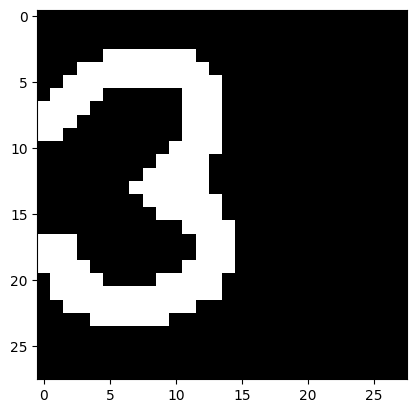

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

# idx = 314
# img = X.iloc[idx].values.reshape(28, 28)  # Use iloc if loc gives an error
# print(Y[idx])
# plt.imshow(img, cmap='gray')

idx = 314
img = X.iloc[idx].values.reshape(28, 28)  # Reshape to (28,28)
print(img.shape)  # Check shape
print(img.dtype)  # Check data type
img = img.astype('float32')  # Ensure valid data type
plt.imshow(img, cmap='gray')  # Display image

# Train-Test split

In [9]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)


# Fit the model using svc and also save the model using joblib

In [12]:
import joblib
from sklearn.svm import SVC
# Initialize classifier
classifier=SVC(kernel="linear", random_state=6)

# Train model
classifier.fit(train_x,train_y)

# Save the model
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

# Calculate accuracy

In [ ]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

In [ ]:
# Accuracy = 0.975

# Live Prediction

In [ ]:
#prediction of image drawn in paint
  
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab
  
model=joblib.load("model/digit_recognizer")
image_folder="img/"
  
while True:
   img=ImageGrab.grab(bbox=(60,170,400,500))
    
   img.save(images_folder+"img.png")
   im = cv2.imread(images_folder+"img.png")
   im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
   im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
    
   #Threshold the image
   ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
   roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
    
   rows,cols=roi.shape
        
   X = []
    
   ##  Fill the data array with pixels one by one.
   for i in range(rows):
       for j in range(cols):
           k = roi[i,j]
           if k>100:
               k=1
           else:
               k=0
           X.append(k)
            
   predictions  =model.predict([X])
   print("Prediction:",predictions[0])
   cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
    
   cv2.startWindowThread()
   cv2.namedWindow("Result")
   cv2.imshow("Result",im)
   cv2.waitKey(10000)
   if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
       break
   cv2.destroyAllWindows()